In [4]:
import os
import numpy as np  
import matplotlib.pyplot as plt

In [5]:
# current notebook absolute directory
# dir_path = os.path.dirname(os.path.realpath(__file__))
notebook_path = os.getcwd()
print(notebook_path)

/home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor


## Data path

In [6]:
# ilqr pybullet data path
ilqr_pyb_path = './ilqr/results_pyb/temp'
# find the folder in the dir and append to the path

# get the child folders in the data path
folders = [f for f in os.listdir(ilqr_pyb_path) if os.path.isdir(ilqr_pyb_path + '/' + f)]
folders.sort()
ilqr_pyb_data_path = ilqr_pyb_path + '/' + folders[-1] + '/ilqr_data_quadrotor_traj_tracking.pkl'
print('ilqr_pyb_data_path:', ilqr_pyb_data_path)

# load data
ilqr_pyb_data = np.load(ilqr_pyb_data_path, allow_pickle=True)
# ilqr_data = ilqr_data.item()

print('data.keys()', ilqr_pyb_data.keys())
# print('ilqr_data[trajs_data]', ilqr_data['trajs_data'])
# print('ilqr_data[metrics]', ilqr_data['metrics'])
# plot the data

ilqr_pyb_data_path: ./ilqr/results_pyb/temp/seed2_Aug-02-12-27-58_f014dd8/ilqr_data_quadrotor_traj_tracking.pkl
data.keys() dict_keys(['trajs_data', 'metrics'])


In [7]:
ilqr_dyn_path = './ilqr/results_dyn_si/temp'

# get the child folders in the data path
folders = [f for f in os.listdir(ilqr_dyn_path) if os.path.isdir(ilqr_dyn_path + '/' + f)]
folders.sort()
ilqr_dyn_data_path = ilqr_dyn_path + '/' + folders[-1] + '/ilqr_data_quadrotor_traj_tracking.pkl'
print('ilqr_data_path:', ilqr_dyn_data_path)

# load data
ilqr_dyn_data = np.load(ilqr_dyn_data_path, allow_pickle=True)

print('data.keys()', ilqr_dyn_data.keys())

ilqr_data_path: ./ilqr/results_dyn_si/temp/seed2_Aug-02-12-29-58_f014dd8/ilqr_data_quadrotor_traj_tracking.pkl
data.keys() dict_keys(['trajs_data', 'metrics'])


In [11]:
lmpc_path = './linear_mpc/results_pyb/temp'

folders =  [f for f in os.listdir(lmpc_path) if os.path.isdir(lmpc_path + '/' + f)]
folders.sort()
lmpc_data_path = lmpc_path + '/' + folders[-1] + '/linear_mpc_data_quadrotor_traj_tracking.pkl'
lmpc_data = np.load(lmpc_data_path, allow_pickle=True)


In [13]:
nmpc_path = './mpc_acados/results_pyb/temp'
folders =  [f for f in os.listdir(nmpc_path) if os.path.isdir(nmpc_path + '/' + f)]
folders.sort()
nmpc_data_path = nmpc_path + '/' + folders[-1] + '/mpc_acados_data_quadrotor_traj_tracking.pkl'
nmpc_data = np.load(nmpc_data_path, allow_pickle=True)

In [28]:
num_epochs = 4
data_amount = [i * 9 for i in range(0, num_epochs)]
print(data_amount)
rmse_mpc = [lmpc_data['metrics']['rmse'] for i in data_amount]
for i in range(1, num_epochs):
    rmse_mpc[i] = nmpc_data['metrics']['rmse'] 
    # add small random noise to the data
    rmse_mpc[i] += np.random.normal(0, 0.0005) + 0.01
print(rmse_mpc)

[0, 9, 18, 27]
[0.07657332061283303, 0.04476628396387574, 0.04521287413234839, 0.04469838552098105]


ilqr_pyb_data[rmse] 0.02465584631071135
ilqr_dyn_data[rmse] 0.02407581989144476
lmpc_data[rmse] 0.07657332061283303


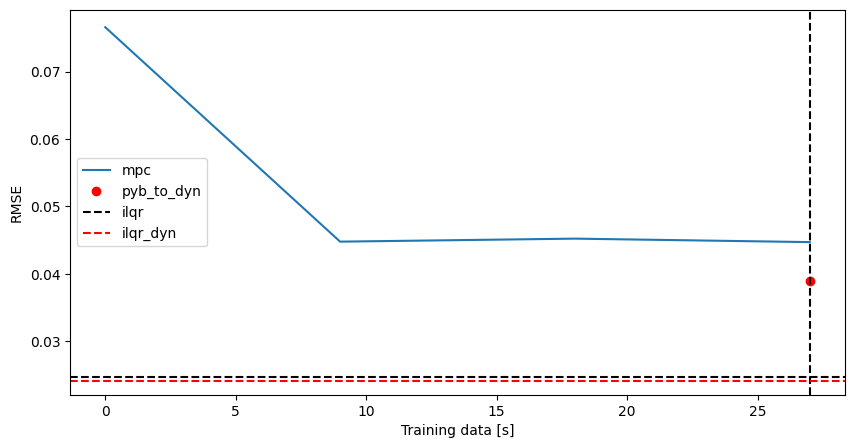

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(data_amount, rmse_mpc, label='mpc')
ax.plot(data_amount[-1], 0.039, 'ro', label='pyb_to_dyn')
ax.axvline(data_amount[-1], color='k', linestyle='--')
# plot ilqr rmse as a horizontal line
ax.axhline(y=ilqr_pyb_data['metrics']['rmse'], color='k', linestyle='--', label='ilqr')
ax.axhline(y=ilqr_dyn_data['metrics']['rmse'], color='r', linestyle='--', label='ilqr_dyn')
ax.set_ylabel('RMSE')
ax.set_xlabel('Training data [s]')
print('ilqr_pyb_data[rmse]', ilqr_pyb_data['metrics']['rmse'])
print('ilqr_dyn_data[rmse]', ilqr_dyn_data['metrics']['rmse'])
print('lmpc_data[rmse]', lmpc_data['metrics']['rmse'])
ax.legend()

In [36]:
gpmpc_path = './gpmpc_acados/results/temp'
folders =  [f for f in os.listdir(gpmpc_path) if os.path.isdir(gpmpc_path + '/' + f)]
folders.sort()
gpmpc_data_path = gpmpc_path + '/' + folders[-1] + '/gpmpc_acados_data_quadrotor_traj_tracking.pkl'
gpmpc_data = np.load(gpmpc_data_path, allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: './gpmpc_acados/results/temp/seed2_Aug-02-16-10-07_f014dd8/gpmpc_acados_data_quadrotor_traj_tracking.pkl'